# Data Loaders

In [1]:
# del train_data

In [46]:
from signjoey.helpers import (
    load_config,
    load_checkpoint,
)
from signjoey.data import load_data, make_data_iter
from signjoey.model import build_model
from signjoey.batch import Batch
from torchtext.data import Dataset
from signjoey.vocabulary import (
    TextVocabulary,
    GlossVocabulary,
    PAD_TOKEN,
    EOS_TOKEN,
    BOS_TOKEN,
)

In [47]:
cfg_file = 'configs/example.yaml'
ckpt = 'output/best-kaggle.ckpt'

cfg = load_config(cfg_file)

In [48]:
train_data, dev_data, test_data, gls_vocab, txt_vocab = load_data(data_cfg=cfg["data"])
del train_data, test_data

In [49]:
dev_data.fields

{'sequence': <torchtext.data.field.RawField at 0x238a7a47550>,
 'signer': <torchtext.data.field.RawField at 0x238a7a46f20>,
 'sgn': <torchtext.data.field.Field at 0x238a7a47790>,
 'gls': <torchtext.data.field.Field at 0x238a7a472b0>,
 'txt': <torchtext.data.field.Field at 0x238a7a479d0>}

In [50]:
dev_data[0].__dict__.values()

dict_values(['dev/11August_2010_Wednesday_tagesschau-2', 'Signer08', [tensor([4.1970e-01, 1.7552e+00, 2.4212e-01,  ..., 1.0000e-08, 1.0000e-08,
        1.0000e-08]), tensor([2.3592e+00, 2.2639e+00, 4.4332e-01,  ..., 1.0000e-08, 1.0000e-08,
        1.0000e-08]), tensor([5.0251e+00, 2.1903e+00, 1.3583e-01,  ..., 5.7079e-02, 1.0000e-08,
        1.0000e-08]), tensor([5.3371e+00, 1.3213e+00, 1.0000e-08,  ..., 2.1011e+00, 1.0000e-08,
        1.0000e-08]), tensor([4.2258e+00, 2.5479e+00, 1.0000e-08,  ..., 8.2129e-01, 1.0000e-08,
        1.0000e-08]), tensor([3.6651e+00, 3.7671e+00, 1.0000e-08,  ..., 3.9290e-01, 1.0000e-08,
        1.0818e-01]), tensor([3.1189e+00, 3.1486e+00, 1.0000e-08,  ..., 1.8473e-01, 1.0000e-08,
        1.0979e+00]), tensor([4.0009e+00, 3.6177e+00, 1.0000e-08,  ..., 1.0000e-08, 1.0000e-08,
        2.3070e+00]), tensor([4.9496e+00, 3.4256e+00, 1.0000e-08,  ..., 1.0000e-08, 1.0000e-08,
        2.5931e+00]), tensor([6.0652e+00, 3.4525e+00, 4.0531e-02,  ..., 1.0000e-08, 1.00

In [51]:

train_config = cfg["training"]

valid_iter = make_data_iter(
    dev_data,
    batch_size=train_config['batch_size'],
    batch_type=train_config['batch_type'],
    train=False,
    shuffle=False,
)

In [52]:
frame_subsampling_ratio = cfg["data"].get(
    "frame_subsampling_ratio", None
)
random_frame_subsampling = cfg["data"].get(
    "random_frame_subsampling", None
)
random_frame_masking_ratio = cfg["data"].get(
    "random_frame_masking_ratio", None
)
txt_pad_idx = txt_vocab.stoi[PAD_TOKEN]

In [53]:
for batch in iter(valid_iter):
    # reactivate training
    # create a Batch object from torchtext batch
    batch = Batch(
        is_train=False,
        torch_batch=batch,
        txt_pad_index= txt_pad_idx,
        sgn_dim=cfg['data']['feature_size'],
        use_cuda=False,
        frame_subsampling_ratio=frame_subsampling_ratio,
        random_frame_subsampling=random_frame_subsampling,
        random_frame_masking_ratio=random_frame_masking_ratio,
    )
    break

d:\CS4203 - FYP\project folder\Signify\strf\lib\site-packages\torchtext\data\field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)


In [55]:
batch.sgn.shape, batch.sgn_mask.shape

(torch.Size([32, 165, 1024]), torch.Size([32, 1, 165]))

In [54]:
batch.sgn[0].shape

torch.Size([165, 1024])

In [34]:
len(batch.sgn_mask), len(batch.sgn_mask[0][0]) 

(32, 165)

In [69]:
batch.sgn[0]

tensor([[4.1970e-01, 1.7552e+00, 2.4212e-01,  ..., 1.0000e-08, 1.0000e-08,
         1.0000e-08],
        [2.3592e+00, 2.2639e+00, 4.4332e-01,  ..., 1.0000e-08, 1.0000e-08,
         1.0000e-08],
        [5.0251e+00, 2.1903e+00, 1.3583e-01,  ..., 5.7079e-02, 1.0000e-08,
         1.0000e-08],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [67]:
batch.sgn_mask[0]

tensor([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, F

In [57]:
import pickle
import gzip
filename = 'data/phoenix14t.pami0.dev'


with gzip.open(filename, "rb") as f:
    loaded_object = pickle.load(f)

In [58]:
loaded_object[0]['sign'].shape

torch.Size([42, 1024])

In [64]:
i=-1
loaded_object[0]['sign'][i].shape

torch.Size([1024])

In [65]:
import torch

loaded_object[0]['sign'][i] != torch.zeros(loaded_object[0]['sign'][i].shape).shape

True

# Load Model

In [4]:
model_checkpoint = load_checkpoint(ckpt, use_cuda=False)

In [39]:
do_recognition = cfg["training"].get("recognition_loss_weight", 1.0) > 0.0
do_translation = cfg["training"].get("translation_loss_weight", 1.0) > 0.0

model = build_model(
    cfg=cfg["model"],
    gls_vocab=gls_vocab,
    txt_vocab=txt_vocab,
    sgn_dim=sum(cfg["data"]["feature_size"])
    if isinstance(cfg["data"]["feature_size"], list)
    else cfg["data"]["feature_size"],
    do_recognition=do_recognition,
    do_translation=do_translation,
    ensemble=False,
    ensembleN=1
)

512
512
512
512
512
512


In [6]:
model_checkpoint.keys()

dict_keys(['steps', 'total_txt_tokens', 'total_gls_tokens', 'best_ckpt_score', 'best_all_ckpt_scores', 'best_ckpt_iteration', 'model_state', 'optimizer_state', 'scheduler_state'])

In [15]:
model_checkpoint['model_state'].keys()

odict_keys(['encoder.layers.0.layer_norm.weight', 'encoder.layers.0.layer_norm.bias', 'encoder.layers.0.src_src_att.k_layer.posterior_mean', 'encoder.layers.0.src_src_att.k_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.k_layer.bias_mean', 'encoder.layers.0.src_src_att.k_layer.bias_un_scale', 'encoder.layers.0.src_src_att.v_layer.posterior_mean', 'encoder.layers.0.src_src_att.v_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.v_layer.bias_mean', 'encoder.layers.0.src_src_att.v_layer.bias_un_scale', 'encoder.layers.0.src_src_att.q_layer.posterior_mean', 'encoder.layers.0.src_src_att.q_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.q_layer.bias_mean', 'encoder.layers.0.src_src_att.q_layer.bias_un_scale', 'encoder.layers.0.src_src_att.output_layer.posterior_mean', 'encoder.layers.0.src_src_att.output_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.output_layer.bias_mean', 'encoder.layers.0.src_src_att.output_layer.bias_un_scale', 'encoder.layers.0.src_

In [40]:
model.load_state_dict(model_checkpoint["model_state"])

<All keys matched successfully>

In [44]:
model.sgn_embed

SpatialEmbeddings(embedding_dim=512, input_size=1024)

In [42]:
embeddings = model.sgn_embed(batch.sgn, batch.sgn_mask)

In [43]:
embeddings.shape

torch.Size([32, 165, 512])

In [46]:
output = model.encoder(embeddings, batch.sgn_mask)

In [48]:
output[0]

tensor([[[ 0.2181,  0.5392,  0.2666,  ...,  1.9912, -0.2534, -0.1238],
         [ 0.3249, -0.1509, -0.1520,  ...,  1.1652, -0.1434, -0.0041],
         [ 0.3100, -0.1471, -0.3730,  ...,  0.5793, -1.0380,  1.2287],
         ...,
         [-0.1267, -0.1866,  1.0359,  ...,  0.8788, -0.9316, -0.5963],
         [-0.5408,  0.4729,  0.1245,  ...,  0.9377, -0.9623, -0.9559],
         [ 0.4522, -0.1276,  0.4823,  ...,  0.0464, -1.4490, -1.3038]],

        [[-0.0720, -0.3846, -0.0576,  ...,  0.0783, -0.3989, -0.2873],
         [-0.0642, -0.6298,  0.1268,  ...,  0.0550, -0.0311, -0.1896],
         [-0.0707, -1.0677,  0.3072,  ...,  0.1430, -0.4266, -0.3633],
         ...,
         [-0.0641,  0.4085, -0.3759,  ...,  0.6881, -0.3928, -0.4809],
         [-0.2206, -0.2361, -0.1940,  ...,  0.0339, -1.2790, -0.4826],
         [ 0.5658, -0.4308, -0.1457,  ...,  0.3657, -1.2463,  0.0250]],

        [[-0.0565, -0.3880, -0.7907,  ...,  0.4861,  0.4019,  0.4380],
         [ 0.4766, -0.4889, -0.2924,  ...,  0

In [50]:
output[0].shape

torch.Size([32, 165, 512])

# Model Encoder and Spatial Embeddings

In [17]:
from signjoey.embeddings import SpatialEmbeddings
from signjoey.encoders import TransformerEncoder


sgn_dim=sum(cfg["data"]["feature_size"]) if isinstance(cfg["data"]["feature_size"], list) else cfg["data"]["feature_size"]

cfg = cfg["model"]

sgn_embed: SpatialEmbeddings = SpatialEmbeddings(
    **cfg["encoder"]["embeddings"],
    num_heads=cfg["encoder"]["num_heads"],
    input_size=sgn_dim,
    inference_sample_size=cfg['inference_sample_size']
)


enc_dropout = cfg["encoder"].get("dropout", 0.0)
enc_emb_dropout = cfg["encoder"]["embeddings"].get("dropout", enc_dropout)

encoder = TransformerEncoder(
    **cfg["encoder"],
    emb_size=sgn_embed.embedding_dim,
    emb_dropout=enc_emb_dropout,
    inference_sample_size=cfg['inference_sample_size']
)

512
512


In [18]:
sgn_embed

SpatialEmbeddings(embedding_dim=512, input_size=1024)

In [19]:
encoder

TransformerEncoder(num_layers=2, num_heads=8)

In [22]:
model_checkpoint = load_checkpoint(ckpt, use_cuda=False)

In [23]:
model_checkpoint.keys()

dict_keys(['steps', 'total_txt_tokens', 'total_gls_tokens', 'best_ckpt_score', 'best_all_ckpt_scores', 'best_ckpt_iteration', 'model_state', 'optimizer_state', 'scheduler_state'])

In [24]:
model_checkpoint["model_state"].keys()

odict_keys(['encoder.layers.0.layer_norm.weight', 'encoder.layers.0.layer_norm.bias', 'encoder.layers.0.src_src_att.k_layer.posterior_mean', 'encoder.layers.0.src_src_att.k_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.k_layer.bias_mean', 'encoder.layers.0.src_src_att.k_layer.bias_un_scale', 'encoder.layers.0.src_src_att.v_layer.posterior_mean', 'encoder.layers.0.src_src_att.v_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.v_layer.bias_mean', 'encoder.layers.0.src_src_att.v_layer.bias_un_scale', 'encoder.layers.0.src_src_att.q_layer.posterior_mean', 'encoder.layers.0.src_src_att.q_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.q_layer.bias_mean', 'encoder.layers.0.src_src_att.q_layer.bias_un_scale', 'encoder.layers.0.src_src_att.output_layer.posterior_mean', 'encoder.layers.0.src_src_att.output_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.output_layer.bias_mean', 'encoder.layers.0.src_src_att.output_layer.bias_un_scale', 'encoder.layers.0.src_

In [30]:
encoder_state_dict = {k[8:]: v for k, v in model_checkpoint["model_state"].items() if k.startswith('encoder.')}

In [31]:
encoder_state_dict.keys()

dict_keys(['layers.0.layer_norm.weight', 'layers.0.layer_norm.bias', 'layers.0.src_src_att.k_layer.posterior_mean', 'layers.0.src_src_att.k_layer.posterior_un_scale', 'layers.0.src_src_att.k_layer.bias_mean', 'layers.0.src_src_att.k_layer.bias_un_scale', 'layers.0.src_src_att.v_layer.posterior_mean', 'layers.0.src_src_att.v_layer.posterior_un_scale', 'layers.0.src_src_att.v_layer.bias_mean', 'layers.0.src_src_att.v_layer.bias_un_scale', 'layers.0.src_src_att.q_layer.posterior_mean', 'layers.0.src_src_att.q_layer.posterior_un_scale', 'layers.0.src_src_att.q_layer.bias_mean', 'layers.0.src_src_att.q_layer.bias_un_scale', 'layers.0.src_src_att.output_layer.posterior_mean', 'layers.0.src_src_att.output_layer.posterior_un_scale', 'layers.0.src_src_att.output_layer.bias_mean', 'layers.0.src_src_att.output_layer.bias_un_scale', 'layers.0.src_src_att.pe.pe', 'layers.0.feed_forward.layer_norm.weight', 'layers.0.feed_forward.layer_norm.bias', 'layers.0.feed_forward.pwff_layer.0.posterior_mean', 

In [35]:
embed_state_dict = {k[10:]: v for k, v in model_checkpoint["model_state"].items() if k.startswith('sgn_embed.')}

In [36]:
embed_state_dict.keys()

dict_keys(['ln.posterior_mean', 'ln.posterior_un_scale', 'ln.bias_mean', 'ln.bias_un_scale', 'norm.norm.weight', 'norm.norm.bias', 'norm.norm.running_mean', 'norm.norm.running_var', 'norm.norm.num_batches_tracked'])

In [32]:
encoder.load_state_dict(encoder_state_dict)

<All keys matched successfully>

In [37]:
sgn_embed.load_state_dict(embed_state_dict)

<All keys matched successfully>

In [75]:
import torch
padding_frames = 60
x_data = torch.rand(165-padding_frames, 1024)
x_padding = torch.zeros(padding_frames, 1024)
x = torch.cat((x_data,x_padding), dim=0)

In [77]:
padding_frames = 60
batch_size = 32
batch = torch.stack([torch.cat(( torch.rand(165-padding_frames, 1024), torch.zeros(padding_frames, 1024)), dim=0)
     for _ in range(batch_size)])

In [79]:
batch.shape

torch.Size([32, 165, 1024])

In [89]:
batch_mask = (batch != torch.zeros(batch.shape))[..., 0].unsqueeze(1)

In [90]:
sgn_embed(batch, batch_mask)

tensor([[[-4.8109e-01,  9.8995e-01,  3.4892e-01,  ...,  5.4825e-01,
           6.6021e-01,  7.6151e-01],
         [-2.2759e-01, -2.3168e-01, -1.4340e-01,  ...,  2.8774e-01,
           1.7268e-01,  4.5916e-01],
         [-4.2845e-01, -5.9387e-01,  3.9268e-01,  ...,  5.1855e-01,
           3.6577e-01,  6.0709e-01],
         ...,
         [-7.1352e-03,  1.0096e-02, -6.6077e-03,  ...,  3.5471e-04,
           2.4301e-03,  8.2106e-04],
         [-7.3941e-03,  2.7689e-02, -3.1992e-03,  ...,  6.7211e-04,
           1.2555e-02,  4.3837e-03],
         [-5.0371e-03,  1.7470e-02, -5.5128e-03,  ...,  9.5313e-04,
           4.6329e-03,  4.8824e-03]],

        [[-1.7621e-01,  5.9553e-01,  4.7014e-01,  ...,  5.3717e-01,
           5.2711e-01,  8.2310e-01],
         [-6.4723e-01,  1.6551e+00, -3.2671e+00,  ...,  4.6784e-01,
           2.1821e-01,  3.5520e-01],
         [-3.8199e-01,  4.5525e-01,  4.7457e-01,  ...,  6.5287e-01,
           6.1208e-01,  7.6802e-01],
         ...,
         [-7.3954e-03,  1

In [92]:
encoder(sgn_embed(batch, batch_mask), batch_mask)

(tensor([[[-1.8957e-02,  5.5820e-01,  2.8135e-01,  ...,  3.9143e-01,
           -3.3959e-01, -4.6142e-01],
          [ 1.7597e-01, -7.7673e-03,  4.5392e-01,  ...,  7.4421e-02,
           -3.5196e-01,  9.1896e-01],
          [-2.0575e-01, -4.5636e-01,  5.0728e-01,  ..., -3.3733e-01,
           -5.2209e-01, -1.1721e-01],
          ...,
          [ 2.6505e-01, -5.3801e-01, -7.7448e-01,  ...,  9.1656e-01,
           -1.0880e+00, -6.1250e-01],
          [ 5.8400e-02,  2.9546e-01, -4.6023e-01,  ...,  5.9524e-01,
           -7.7381e-01, -5.9114e-01],
          [ 3.1475e-01, -1.5289e-01,  3.1599e-01,  ...,  7.9507e-01,
           -1.3842e+00, -4.3846e-01]],
 
         [[-5.8543e-02,  1.8828e-01,  3.9843e-01,  ...,  3.4557e-01,
            2.0586e-01,  1.4979e-01],
          [-1.9767e-01,  7.3925e-01, -2.1277e-01,  ...,  4.6405e-01,
            5.7977e-01, -1.2803e-02],
          [ 3.0794e-02,  1.0011e-01, -4.2137e-01,  ...,  5.7893e-01,
           -1.0698e-01,  6.8098e-02],
          ...,
    

# Graph

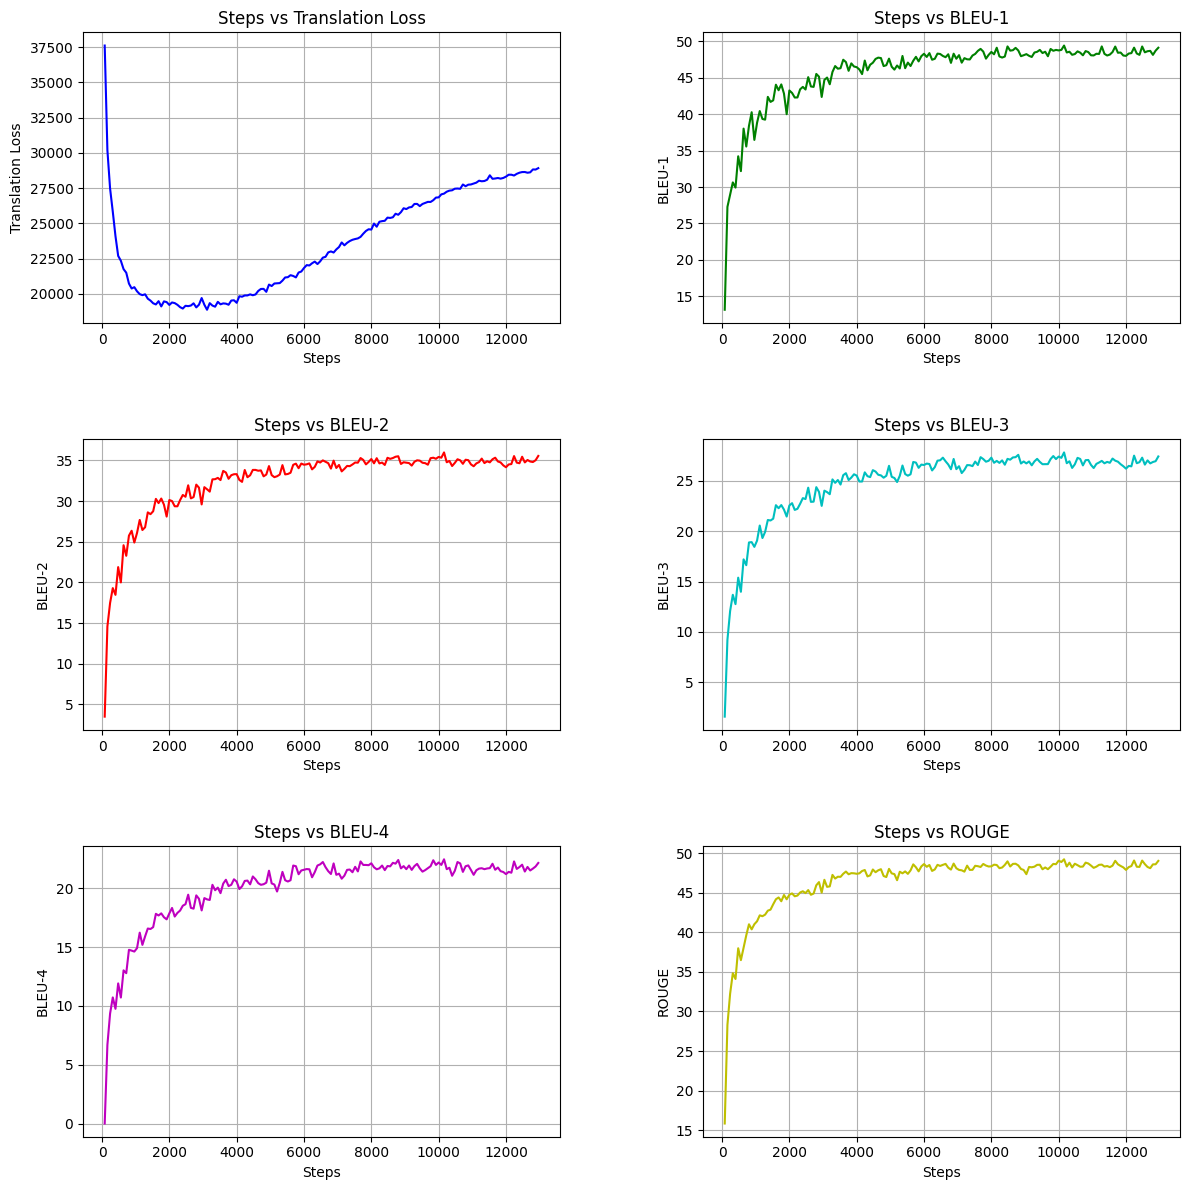

In [5]:
import matplotlib.pyplot as plt

with open('D:/CS4203 - FYP/FYP tests/Stochastic-Transformer-Networks-with-Linear-Competing-Units-Application-to-end-to-end-SL-Translatio/validations.txt', "r") as f:
    data = f.read()

data = data.split('\n')[:-1]

steps = [ int(line.replace('\t', ' ').split(' ')[1]) for line  in data]
translation_loss = [float(line.replace('\t', ' ').split(' ')[7]) for line  in data]
bleu1 = [float(line.replace('\t', ' ').split(' ')[24].replace(',', '')) for line  in data]
bleu2 = [float(line.replace('\t', ' ').split(' ')[26].replace(',', '')) for line  in data]
bleu3 = [float(line.replace('\t', ' ').split(' ')[28].replace(',', '')) for line  in data]
bleu4 = [float(line.replace('\t', ' ').split(' ')[30].replace(')', '')) for line  in data]
rouge = [float(line.replace('\t', ' ').split(' ')[34]) for line  in data]

# print(steps)
# print(translation_loss)
# print(bleu1)
# print(bleu2)
# print(bleu3)
# print(bleu4)
# print(rouge)

fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# Plot translation loss
ax[0, 0].plot(steps, translation_loss, label='Translation Loss', color='b')
ax[0, 0].set_xlabel('Steps')
ax[0, 0].set_ylabel('Translation Loss')
ax[0, 0].set_title('Steps vs Translation Loss')
ax[0, 0].grid(True)

# Plot BLEU-1
ax[0, 1].plot(steps, bleu1, label='BLEU-1', color='g')
ax[0, 1].set_xlabel('Steps')
ax[0, 1].set_ylabel('BLEU-1')
ax[0, 1].set_title('Steps vs BLEU-1')
ax[0, 1].grid(True)

# Plot BLEU-2
ax[1, 0].plot(steps, bleu2, label='BLEU-2', color='r')
ax[1, 0].set_xlabel('Steps')
ax[1, 0].set_ylabel('BLEU-2')
ax[1, 0].set_title('Steps vs BLEU-2')
ax[1, 0].grid(True)

# Plot BLEU-3
ax[1, 1].plot(steps, bleu3, label='BLEU-3', color='c')
ax[1, 1].set_xlabel('Steps')
ax[1, 1].set_ylabel('BLEU-3')
ax[1, 1].set_title('Steps vs BLEU-3')
ax[1, 1].grid(True)

# Plot BLEU-4
ax[2, 0].plot(steps, bleu4, label='BLEU-4', color='m')
ax[2, 0].set_xlabel('Steps')
ax[2, 0].set_ylabel('BLEU-4')
ax[2, 0].set_title('Steps vs BLEU-4')
ax[2, 0].grid(True)

# Plot ROUGE
ax[2, 1].plot(steps, rouge, label='ROUGE', color='y')
ax[2, 1].set_xlabel('Steps')
ax[2, 1].set_ylabel('ROUGE')
ax[2, 1].set_title('Steps vs ROUGE')
ax[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

In [11]:
import matplotlib.pyplot as plt

with open('D:/CS4203 - FYP/FYP tests/Stochastic-Transformer-Networks-with-Linear-Competing-Units-Application-to-end-to-end-SL-Translatio/validations.txt', "r") as f:
    data = f.read()

data = data.split('\n')[:-1]

steps1 = [ int(line.replace('\t', ' ').split(' ')[1]) for line  in data]
translation_loss1 = [float(line.replace('\t', ' ').split(' ')[7]) for line  in data]
bleu11 = [float(line.replace('\t', ' ').split(' ')[24].replace(',', '')) for line  in data]
bleu21 = [float(line.replace('\t', ' ').split(' ')[26].replace(',', '')) for line  in data]
bleu31 = [float(line.replace('\t', ' ').split(' ')[28].replace(',', '')) for line  in data]
bleu41 = [float(line.replace('\t', ' ').split(' ')[30].replace(')', '')) for line  in data]
rouge1 = [float(line.replace('\t', ' ').split(' ')[34]) for line  in data]

In [12]:
import matplotlib.pyplot as plt

with open('output/example22/validations.txt', "r") as f:
    data = f.read()

data = data.split('\n')[:-1]

steps = [ int(line.replace('\t', ' ').split(' ')[1]) for line  in data]
translation_loss = [float(line.replace('\t', ' ').split(' ')[7]) for line  in data]
bleu1 = [float(line.replace('\t', ' ').split(' ')[24].replace(',', '')) for line  in data]
bleu2 = [float(line.replace('\t', ' ').split(' ')[26].replace(',', '')) for line  in data]
bleu3 = [float(line.replace('\t', ' ').split(' ')[28].replace(',', '')) for line  in data]
bleu4 = [float(line.replace('\t', ' ').split(' ')[30].replace(')', '')) for line  in data]
rouge = [float(line.replace('\t', ' ').split(' ')[34]) for line  in data]

In [13]:
# steps = steps if len(steps) > len(steps1) else steps1

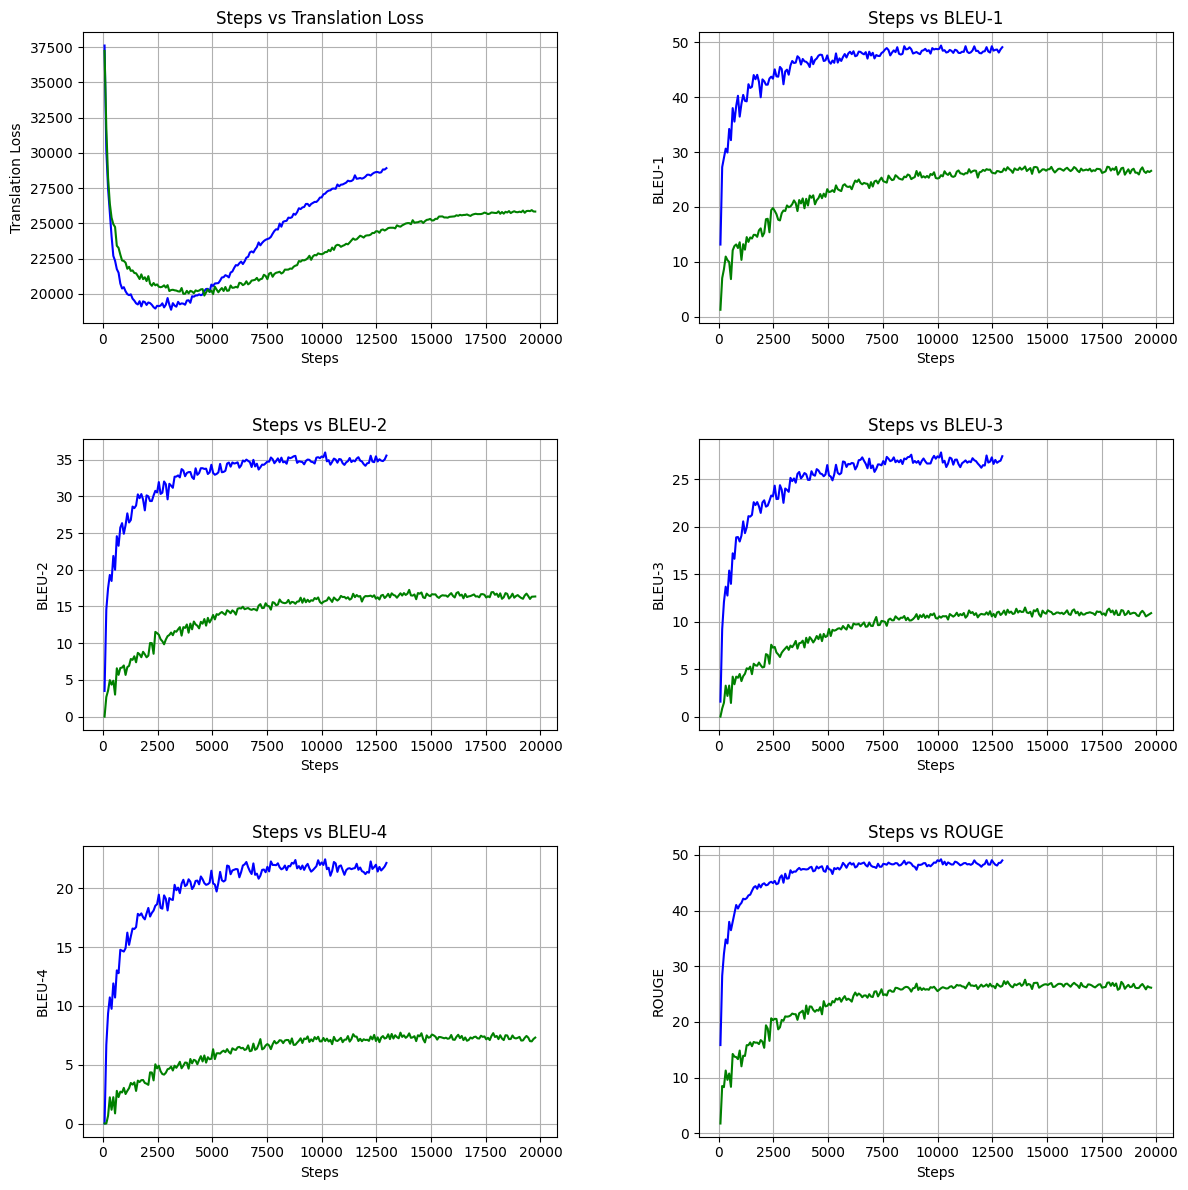

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# Plot translation loss
ax[0, 0].plot(steps1, translation_loss1, label='Translation Loss', color='b')
ax[0, 0].plot(steps, translation_loss, label='Translation Loss', color='g')
ax[0, 0].set_xlabel('Steps')
ax[0, 0].set_ylabel('Translation Loss')
ax[0, 0].set_title('Steps vs Translation Loss')
ax[0, 0].grid(True)

# Plot BLEU-1
ax[0, 1].plot(steps1, bleu11, label='BLEU-1', color='b')
ax[0, 1].plot(steps, bleu1, label='BLEU-1', color='g')
ax[0, 1].set_xlabel('Steps')
ax[0, 1].set_ylabel('BLEU-1')
ax[0, 1].set_title('Steps vs BLEU-1')
ax[0, 1].grid(True)

# Plot BLEU-2
ax[1, 0].plot(steps1, bleu21, label='BLEU-2', color='b')
ax[1, 0].plot(steps, bleu2, label='BLEU-2', color='g')
ax[1, 0].set_xlabel('Steps')
ax[1, 0].set_ylabel('BLEU-2')
ax[1, 0].set_title('Steps vs BLEU-2')
ax[1, 0].grid(True)

# Plot BLEU-3
ax[1, 1].plot(steps1, bleu31, label='BLEU-3', color='b')
ax[1, 1].plot(steps, bleu3, label='BLEU-3', color='g')
ax[1, 1].set_xlabel('Steps')
ax[1, 1].set_ylabel('BLEU-3')
ax[1, 1].set_title('Steps vs BLEU-3')
ax[1, 1].grid(True)

# Plot BLEU-4
ax[2, 0].plot(steps1, bleu41, label='BLEU-4', color='b')
ax[2, 0].plot(steps, bleu4, label='BLEU-4', color='g')
ax[2, 0].set_xlabel('Steps')
ax[2, 0].set_ylabel('BLEU-4')
ax[2, 0].set_title('Steps vs BLEU-4')
ax[2, 0].grid(True)

# Plot ROUGE
ax[2, 1].plot(steps1, rouge1, label='ROUGE', color='b')
ax[2, 1].plot(steps, rouge, label='ROUGE', color='g')
ax[2, 1].set_xlabel('Steps')
ax[2, 1].set_ylabel('ROUGE')
ax[2, 1].set_title('Steps vs ROUGE')
ax[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

# ...

In [1]:
import torch

In [3]:
x = torch.rand((32,40, 512, 4))

In [5]:
x

tensor([[[[0.3947, 0.8943, 0.4786, 0.8140],
          [0.0100, 0.3979, 0.3834, 0.0651],
          [0.6641, 0.2780, 0.4009, 0.2471],
          ...,
          [0.5169, 0.1479, 0.0768, 0.4141],
          [0.7157, 0.0549, 0.5357, 0.7496],
          [0.5879, 0.2362, 0.9764, 0.7648]],

         [[0.5605, 0.9969, 0.2519, 0.2636],
          [0.6109, 0.8026, 0.0318, 0.4982],
          [0.8271, 0.3975, 0.3566, 0.8736],
          ...,
          [0.4491, 0.5882, 0.7505, 0.8952],
          [0.9646, 0.6897, 0.0692, 0.3752],
          [0.1798, 0.5593, 0.5335, 0.3588]],

         [[0.1843, 0.9435, 0.7402, 0.5019],
          [0.5293, 0.9354, 0.4760, 0.7870],
          [0.5336, 0.8117, 0.2304, 0.8981],
          ...,
          [0.3406, 0.0063, 0.0103, 0.7684],
          [0.9843, 0.1602, 0.1173, 0.2229],
          [0.4115, 0.3632, 0.6207, 0.1630]],

         ...,

         [[0.6939, 0.8501, 0.3904, 0.8391],
          [0.7139, 0.0606, 0.1510, 0.4709],
          [0.2213, 0.4069, 0.0806, 0.5855],
          

In [7]:
x[...,1].shape

torch.Size([32, 40, 512])

In [38]:
import torch
from sklearn.preprocessing import LabelEncoder

# Load the checkpoint
checkpoint_path = "SavedModels/classification-01/best_model.pth"
checkpoint = torch.load(checkpoint_path)

# Extract the model state, optimizer state, and label encoder
model_state_dict = checkpoint['model_state_dict']
optimizer_state_dict = checkpoint['optimizer_state_dict']
scheduler_state_dict = checkpoint['scheduler_state_dict']
label_encoder = checkpoint['label_encoder']  # Loaded label encoder

# Use label_encoder in your test or inference pipeline
# For example:
# classes = label_encoder.inverse_transform([0, 1, 2]) # Converts encoded labels back to their original labels


In [42]:
label_encoder.inverse_transform([1, 2, 3])

array(['අංශය', 'අක්කරය', 'අඩංගු'], dtype='<U48')

# Freezing

In [2]:
import os
import torch
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from tqdm import tqdm
from signjoey.helpers import load_config, make_logger, set_seed
from signjoey.classification_model import ClassificationModel
from signjoey.builders import build_optimizer
from signjoey.early_stopping import EarlyStopping
from signjoey.classification_data import load_training_data
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import logging

def get_model(cfg_file: str):

    cfg = load_config(cfg_file)
    train_config = cfg['training']
    
    logger = make_logger(model_dir=train_config["model_dir"], log_file=f"{cfg['name']}_train.log")
    if logger == None:
        logger = logging.getLogger()

    set_seed(seed=cfg["training"].get("random_seed", 42))

    model = ClassificationModel(cfg, logger)

    if model == None:
        print('model none')

    use_cuda = cfg["training"].get("use_cuda", False)
    device = torch.device("cuda" if (torch.cuda.is_available() and use_cuda) else "cpu")
    logger.info(f"device: {device}")

    model.to(device)

    return model

In [25]:
model = get_model("configs\kaggle-ex15-122c-attention-102kpt-ft.yaml")

512
512
512


In [30]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.0995, -0.0083, -0.1862,  ..., -0.1641, -0.1780, -0.1076],
        [-0.1067,  0.0155, -0.1262,  ...,  0.1119, -0.0239,  0.0052],
        [-0.1124, -0.1348, -0.0509,  ..., -0.0861, -0.0244, -0.1365],
        ...,
        [ 0.0871,  0.2104, -0.0049,  ..., -0.0290, -0.1313, -0.0021],
        [-0.0119,  0.1062, -0.1370,  ...,  0.0084, -0.0359,  0.0232],
        [-0.2038, -0.1289, -0.0295,  ...,  0.0111,  0.0672,  0.0747]],
       requires_grad=True)
Parameter containing:
tensor([[-0.1273, -0.1413, -0.1174,  ..., -0.1441, -0.1021, -0.1045],
        [-0.1079, -0.1179, -0.1349,  ..., -0.1037, -0.1059, -0.1164],
        [-0.0938, -0.1512, -0.1234,  ..., -0.0698, -0.1410, -0.1475],
        ...,
        [-0.1310, -0.1628, -0.0850,  ..., -0.1437, -0.2107, -0.1857],
        [-0.1543, -0.1178, -0.1498,  ..., -0.1151, -0.1159, -0.1301],
        [-0.0840, -0.1089, -0.1941,  ..., -0.1816, -0.0999, -0.1474]],
       requires_grad=True)
Parameter containing:
tensor([-6.9

In [48]:
len(model.encoder.layers)

3

In [51]:
model.encoder.layers[0].src_src_att

MultiHeadedAttention(
  (k_layer): DenseBayesian(input_features = 512, output_features = 512, bias = True)
  (v_layer): DenseBayesian(input_features = 512, output_features = 512, bias = True)
  (q_layer): DenseBayesian(input_features = 512, output_features = 512, bias = True)
  (output_layer): DenseBayesian(input_features = 512, output_features = 512, bias = True)
  (softmax): Softmax(dim=-1)
  (dropout): Dropout(p=0.2, inplace=False)
  (pe): PositionalEncoding()
)

In [52]:
for param in model.encoder.layers[0].src_src_att.parameters():
    param.requires_grad = False

for name, param in model.encoder.layers[0].src_src_att.named_parameters():
    print(f"Layer: {name}, Requires Grad: {param.requires_grad}")


Layer: k_layer.posterior_mean, Requires Grad: False
Layer: k_layer.posterior_un_scale, Requires Grad: False
Layer: k_layer.bias_mean, Requires Grad: False
Layer: k_layer.bias_un_scale, Requires Grad: False
Layer: v_layer.posterior_mean, Requires Grad: False
Layer: v_layer.posterior_un_scale, Requires Grad: False
Layer: v_layer.bias_mean, Requires Grad: False
Layer: v_layer.bias_un_scale, Requires Grad: False
Layer: q_layer.posterior_mean, Requires Grad: False
Layer: q_layer.posterior_un_scale, Requires Grad: False
Layer: q_layer.bias_mean, Requires Grad: False
Layer: q_layer.bias_un_scale, Requires Grad: False
Layer: output_layer.posterior_mean, Requires Grad: False
Layer: output_layer.posterior_un_scale, Requires Grad: False
Layer: output_layer.bias_mean, Requires Grad: False
Layer: output_layer.bias_un_scale, Requires Grad: False


In [1]:
import torch

In [13]:
x = torch.rand((32,40,512))

In [14]:
x.shape

torch.Size([32, 40, 512])

In [15]:
layer = torch.nn.Linear(512,1)
att = layer(x)

In [16]:
att.shape

torch.Size([32, 40, 1])

In [21]:
w = torch.softmax(att, dim=1)

In [22]:
w.shape

torch.Size([32, 40, 1])

In [25]:
(x*w).shape

torch.Size([32, 40, 512])

In [28]:
(x*w).sum(dim=1).shape

torch.Size([32, 512])

# Load Decoder & txt Embedding State and Freeze

In [1]:
import os
import torch
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from tqdm import tqdm
from signjoey.helpers import load_config, make_logger, set_seed, load_checkpoint
from signjoey.classification_model import ClassificationModel
from signjoey.builders import build_optimizer
from signjoey.early_stopping import EarlyStopping
from signjoey.classification_data import load_training_data
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import logging
from logging import Logger
from signjoey.data import load_data
from signjoey.model import build_model

def get_model(cfg_file: str):

    cfg = load_config(cfg_file)
    train_data, dev_data, test_data, gls_vocab, txt_vocab = load_data(
        data_cfg=cfg["data"]
    )

    # build model and load parameters into it
    do_recognition = cfg["training"].get("recognition_loss_weight", 1.0) > 0.0
    do_translation = cfg["training"].get("translation_loss_weight", 1.0) > 0.0
    
    model = build_model(
        cfg=cfg["model"],
        gls_vocab=gls_vocab,
        txt_vocab=txt_vocab,
        sgn_dim=sum(cfg["data"]["feature_size"])
        if isinstance(cfg["data"]["feature_size"], list)
        else cfg["data"]["feature_size"],
        do_recognition=do_recognition,
        do_translation=do_translation,
    )

    if model == None:
        print('model none')

    use_cuda = cfg["training"].get("use_cuda", False)
    device = torch.device("cuda" if (torch.cuda.is_available() and use_cuda) else "cpu")

    model.to(device)

    return model

## stochastic

In [2]:
model = get_model("SavedModels/original_data/stochastic_transformer/config.yaml")

512
512
512
512
512
512
512


In [4]:
model

SignModel(
	encoder=TransformerEncoder(num_layers=3, num_heads=8),
	decoder=TransformerDecoder(num_layers=2, num_heads=8),
	sgn_embed=SpatialEmbeddings(embedding_dim=512, input_size=1024),
	txt_embed=Embeddings(embedding_dim=512, vocab_size=2892))

In [5]:
from signjoey.helpers import load_checkpoint

ckpt = "SavedModels/original_data/stochastic_transformer/best.ckpt"
model_checkpoint = load_checkpoint(ckpt, use_cuda=False)

In [6]:
model_checkpoint.keys()

dict_keys(['steps', 'total_txt_tokens', 'total_gls_tokens', 'best_ckpt_score', 'best_all_ckpt_scores', 'best_ckpt_iteration', 'model_state', 'optimizer_state', 'scheduler_state'])

In [7]:
model_checkpoint["best_ckpt_score"]

23.001213575701694

In [8]:
model_checkpoint['model_state'].keys()

odict_keys(['encoder.layers.0.layer_norm.weight', 'encoder.layers.0.layer_norm.bias', 'encoder.layers.0.src_src_att.k_layer.posterior_mean', 'encoder.layers.0.src_src_att.k_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.k_layer.bias_mean', 'encoder.layers.0.src_src_att.k_layer.bias_un_scale', 'encoder.layers.0.src_src_att.v_layer.posterior_mean', 'encoder.layers.0.src_src_att.v_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.v_layer.bias_mean', 'encoder.layers.0.src_src_att.v_layer.bias_un_scale', 'encoder.layers.0.src_src_att.q_layer.posterior_mean', 'encoder.layers.0.src_src_att.q_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.q_layer.bias_mean', 'encoder.layers.0.src_src_att.q_layer.bias_un_scale', 'encoder.layers.0.src_src_att.output_layer.posterior_mean', 'encoder.layers.0.src_src_att.output_layer.posterior_un_scale', 'encoder.layers.0.src_src_att.output_layer.bias_mean', 'encoder.layers.0.src_src_att.output_layer.bias_un_scale', 'encoder.layers.0.src_

In [9]:
decoder_state_dict = {k[8:]: v for k, v in model_checkpoint["model_state"].items() if k.startswith('decoder.')}

In [10]:
decoder_state_dict.keys()

dict_keys(['layers.0.trg_trg_att.k_layer.posterior_mean', 'layers.0.trg_trg_att.k_layer.posterior_un_scale', 'layers.0.trg_trg_att.k_layer.bias_mean', 'layers.0.trg_trg_att.k_layer.bias_un_scale', 'layers.0.trg_trg_att.v_layer.posterior_mean', 'layers.0.trg_trg_att.v_layer.posterior_un_scale', 'layers.0.trg_trg_att.v_layer.bias_mean', 'layers.0.trg_trg_att.v_layer.bias_un_scale', 'layers.0.trg_trg_att.q_layer.posterior_mean', 'layers.0.trg_trg_att.q_layer.posterior_un_scale', 'layers.0.trg_trg_att.q_layer.bias_mean', 'layers.0.trg_trg_att.q_layer.bias_un_scale', 'layers.0.trg_trg_att.output_layer.posterior_mean', 'layers.0.trg_trg_att.output_layer.posterior_un_scale', 'layers.0.trg_trg_att.output_layer.bias_mean', 'layers.0.trg_trg_att.output_layer.bias_un_scale', 'layers.0.trg_trg_att.pe.pe', 'layers.0.src_trg_att.k_layer.posterior_mean', 'layers.0.src_trg_att.k_layer.posterior_un_scale', 'layers.0.src_trg_att.k_layer.bias_mean', 'layers.0.src_trg_att.k_layer.bias_un_scale', 'layers.0

In [11]:
txt_embed_state_dict = {k[10:]: v for k, v in model_checkpoint["model_state"].items() if k.startswith('txt_embed.')}
txt_embed_state_dict.keys()

dict_keys(['lut.weight', 'norm.norm.weight', 'norm.norm.bias', 'norm.norm.running_mean', 'norm.norm.running_var', 'norm.norm.num_batches_tracked'])

In [12]:
model.decoder

TransformerDecoder(num_layers=2, num_heads=8)

In [13]:
model.decoder.load_state_dict(decoder_state_dict)

<All keys matched successfully>

In [14]:
model.decoder.parameters

<bound method Module.parameters of TransformerDecoder(num_layers=2, num_heads=8)>

In [15]:
ps = model.decoder.parameters()

In [16]:
for name, p in model.decoder.named_parameters():
    # if p.requires_grad:
    print(name,"\n" , p.data)
    break

layers.0.trg_trg_att.k_layer.posterior_mean 
 tensor([[ 0.0496,  0.0354, -0.0173,  ...,  0.0043,  0.0924, -0.0213],
        [ 0.1073,  0.0747, -0.0022,  ...,  0.1847,  0.0365,  0.0298],
        [ 0.1348,  0.1178, -0.0735,  ..., -0.0395,  0.1456, -0.0308],
        ...,
        [ 0.1406,  0.2337,  0.0129,  ..., -0.0251, -0.0713,  0.0719],
        [-0.0436, -0.0682,  0.0203,  ..., -0.1198, -0.0377, -0.0444],
        [ 0.0837,  0.0008,  0.0632,  ..., -0.0197, -0.0869,  0.1184]])


In [17]:
decoder_state_dict['layers.0.trg_trg_att.k_layer.posterior_mean']

tensor([[ 0.0496,  0.0354, -0.0173,  ...,  0.0043,  0.0924, -0.0213],
        [ 0.1073,  0.0747, -0.0022,  ...,  0.1847,  0.0365,  0.0298],
        [ 0.1348,  0.1178, -0.0735,  ..., -0.0395,  0.1456, -0.0308],
        ...,
        [ 0.1406,  0.2337,  0.0129,  ..., -0.0251, -0.0713,  0.0719],
        [-0.0436, -0.0682,  0.0203,  ..., -0.1198, -0.0377, -0.0444],
        [ 0.0837,  0.0008,  0.0632,  ..., -0.0197, -0.0869,  0.1184]])

In [18]:
model.txt_embed.load_state_dict(txt_embed_state_dict)

<All keys matched successfully>

In [19]:
for name, p in model.txt_embed.named_parameters():
    # if p.requires_grad:
    print(name,"\n" , p.data)
    break

lut.weight 
 tensor([[-0.0156, -0.0102,  0.0265,  ...,  0.0046,  0.0241,  0.0221],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0019, -0.0119,  0.0132,  ...,  0.0183, -0.0233,  0.0138],
        ...,
        [-0.0224,  0.0021,  0.0221,  ..., -0.0043, -0.0263,  0.0409],
        [ 0.0351,  0.0346, -0.0186,  ...,  0.0245, -0.0009,  0.0321],
        [ 0.0242,  0.0250, -0.0224,  ...,  0.0094,  0.0013,  0.0349]])


In [20]:
txt_embed_state_dict['lut.weight']

tensor([[-0.0156, -0.0102,  0.0265,  ...,  0.0046,  0.0241,  0.0221],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0019, -0.0119,  0.0132,  ...,  0.0183, -0.0233,  0.0138],
        ...,
        [-0.0224,  0.0021,  0.0221,  ..., -0.0043, -0.0263,  0.0409],
        [ 0.0351,  0.0346, -0.0186,  ...,  0.0245, -0.0009,  0.0321],
        [ 0.0242,  0.0250, -0.0224,  ...,  0.0094,  0.0013,  0.0349]])

In [21]:
from signjoey.helpers import freeze_params

freeze_params(model.decoder)
freeze_params(model.txt_embed)

In [24]:
for name, p in model.named_parameters():
    if not p.requires_grad:
        print(name,":" , p.requires_grad)

decoder.layers.0.trg_trg_att.k_layer.posterior_mean : False
decoder.layers.0.trg_trg_att.k_layer.posterior_un_scale : False
decoder.layers.0.trg_trg_att.k_layer.bias_mean : False
decoder.layers.0.trg_trg_att.k_layer.bias_un_scale : False
decoder.layers.0.trg_trg_att.v_layer.posterior_mean : False
decoder.layers.0.trg_trg_att.v_layer.posterior_un_scale : False
decoder.layers.0.trg_trg_att.v_layer.bias_mean : False
decoder.layers.0.trg_trg_att.v_layer.bias_un_scale : False
decoder.layers.0.trg_trg_att.q_layer.posterior_mean : False
decoder.layers.0.trg_trg_att.q_layer.posterior_un_scale : False
decoder.layers.0.trg_trg_att.q_layer.bias_mean : False
decoder.layers.0.trg_trg_att.q_layer.bias_un_scale : False
decoder.layers.0.trg_trg_att.output_layer.posterior_mean : False
decoder.layers.0.trg_trg_att.output_layer.posterior_un_scale : False
decoder.layers.0.trg_trg_att.output_layer.bias_mean : False
decoder.layers.0.trg_trg_att.output_layer.bias_un_scale : False
decoder.layers.0.src_trg_att

## vanilla

In [25]:
model = get_model("SavedModels/original_data/vanilla_transformer/config.yaml")

512
512
512
512
512
512
512
512
512


In [26]:
model

SignModel(
	encoder=TransformerEncoder(num_layers=3, num_heads=8),
	decoder=TransformerDecoder(num_layers=3, num_heads=8),
	sgn_embed=SpatialEmbeddings(embedding_dim=512, input_size=1024),
	txt_embed=Embeddings(embedding_dim=512, vocab_size=2892))

In [27]:
from signjoey.helpers import load_checkpoint

ckpt = "SavedModels/original_data/vanilla_transformer/best.ckpt"
model_checkpoint = load_checkpoint(ckpt, use_cuda=False)

In [28]:
model_checkpoint.keys()

dict_keys(['steps', 'total_txt_tokens', 'total_gls_tokens', 'best_ckpt_score', 'best_all_ckpt_scores', 'best_ckpt_iteration', 'model_state', 'optimizer_state', 'scheduler_state'])

In [29]:
model_checkpoint["best_ckpt_score"]

20.20799335983417

In [30]:
model_checkpoint['model_state'].keys()

odict_keys(['encoder.layers.0.layer_norm.weight', 'encoder.layers.0.layer_norm.bias', 'encoder.layers.0.src_src_att.k_layer.weight', 'encoder.layers.0.src_src_att.k_layer.bias', 'encoder.layers.0.src_src_att.v_layer.weight', 'encoder.layers.0.src_src_att.v_layer.bias', 'encoder.layers.0.src_src_att.q_layer.weight', 'encoder.layers.0.src_src_att.q_layer.bias', 'encoder.layers.0.src_src_att.output_layer.weight', 'encoder.layers.0.src_src_att.output_layer.bias', 'encoder.layers.0.src_src_att.pe.pe', 'encoder.layers.0.feed_forward.layer_norm.weight', 'encoder.layers.0.feed_forward.layer_norm.bias', 'encoder.layers.0.feed_forward.pwff_layer.0.weight', 'encoder.layers.0.feed_forward.pwff_layer.0.bias', 'encoder.layers.0.feed_forward.pwff_layer.3.weight', 'encoder.layers.0.feed_forward.pwff_layer.3.bias', 'encoder.layers.1.layer_norm.weight', 'encoder.layers.1.layer_norm.bias', 'encoder.layers.1.src_src_att.k_layer.weight', 'encoder.layers.1.src_src_att.k_layer.bias', 'encoder.layers.1.src_sr

In [31]:
decoder_state_dict = {k[8:]: v for k, v in model_checkpoint["model_state"].items() if k.startswith('decoder.')}

In [32]:
decoder_state_dict.keys()

dict_keys(['layers.0.trg_trg_att.k_layer.weight', 'layers.0.trg_trg_att.k_layer.bias', 'layers.0.trg_trg_att.v_layer.weight', 'layers.0.trg_trg_att.v_layer.bias', 'layers.0.trg_trg_att.q_layer.weight', 'layers.0.trg_trg_att.q_layer.bias', 'layers.0.trg_trg_att.output_layer.weight', 'layers.0.trg_trg_att.output_layer.bias', 'layers.0.trg_trg_att.pe.pe', 'layers.0.src_trg_att.k_layer.weight', 'layers.0.src_trg_att.k_layer.bias', 'layers.0.src_trg_att.v_layer.weight', 'layers.0.src_trg_att.v_layer.bias', 'layers.0.src_trg_att.q_layer.weight', 'layers.0.src_trg_att.q_layer.bias', 'layers.0.src_trg_att.output_layer.weight', 'layers.0.src_trg_att.output_layer.bias', 'layers.0.src_trg_att.pe.pe', 'layers.0.feed_forward.layer_norm.weight', 'layers.0.feed_forward.layer_norm.bias', 'layers.0.feed_forward.pwff_layer.0.weight', 'layers.0.feed_forward.pwff_layer.0.bias', 'layers.0.feed_forward.pwff_layer.3.weight', 'layers.0.feed_forward.pwff_layer.3.bias', 'layers.0.x_layer_norm.weight', 'layers.0

In [33]:
txt_embed_state_dict = {k[10:]: v for k, v in model_checkpoint["model_state"].items() if k.startswith('txt_embed.')}
txt_embed_state_dict.keys()

dict_keys(['lut.weight', 'norm.norm.weight', 'norm.norm.bias', 'norm.norm.running_mean', 'norm.norm.running_var', 'norm.norm.num_batches_tracked'])

In [34]:
model.decoder

TransformerDecoder(num_layers=3, num_heads=8)

In [35]:
model.decoder.load_state_dict(decoder_state_dict)

<All keys matched successfully>

In [36]:
model.decoder.parameters

<bound method Module.parameters of TransformerDecoder(num_layers=3, num_heads=8)>

In [38]:
for name, p in model.decoder.named_parameters():
    # if p.requires_grad:
    print(name,"\n" , p.data)
    break

layers.0.trg_trg_att.k_layer.weight 
 tensor([[ 0.1145, -0.0631,  0.0763,  ...,  0.0892, -0.0989,  0.1030],
        [-0.1781, -0.0216, -0.0052,  ..., -0.1135, -0.1233, -0.0412],
        [-0.0049, -0.1970,  0.0022,  ..., -0.0812, -0.0346,  0.1030],
        ...,
        [ 0.1133,  0.0681,  0.0096,  ...,  0.0567, -0.0477, -0.0162],
        [-0.1322, -0.0184, -0.0527,  ...,  0.1397,  0.1420,  0.0610],
        [-0.1165, -0.0231, -0.0806,  ...,  0.2083, -0.0223, -0.0460]])


In [40]:
decoder_state_dict['layers.0.trg_trg_att.k_layer.weight']

tensor([[ 0.1145, -0.0631,  0.0763,  ...,  0.0892, -0.0989,  0.1030],
        [-0.1781, -0.0216, -0.0052,  ..., -0.1135, -0.1233, -0.0412],
        [-0.0049, -0.1970,  0.0022,  ..., -0.0812, -0.0346,  0.1030],
        ...,
        [ 0.1133,  0.0681,  0.0096,  ...,  0.0567, -0.0477, -0.0162],
        [-0.1322, -0.0184, -0.0527,  ...,  0.1397,  0.1420,  0.0610],
        [-0.1165, -0.0231, -0.0806,  ...,  0.2083, -0.0223, -0.0460]])

In [41]:
model.txt_embed.load_state_dict(txt_embed_state_dict)

<All keys matched successfully>

In [42]:
for name, p in model.txt_embed.named_parameters():
    # if p.requires_grad:
    print(name,"\n" , p.data)
    break

lut.weight 
 tensor([[-0.0226, -0.0165, -0.0387,  ..., -0.0073, -0.0030, -0.0397],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0198,  0.2320, -0.0052,  ...,  0.0365,  0.0122,  0.0509],
        ...,
        [-0.0035, -0.0281, -0.0340,  ..., -0.0102, -0.0271,  0.0399],
        [-0.0213,  0.0274,  0.0145,  ..., -0.0209, -0.0078,  0.0145],
        [-0.0018, -0.0134,  0.0165,  ..., -0.0228, -0.0141,  0.0106]])


In [43]:
txt_embed_state_dict['lut.weight']

tensor([[-0.0226, -0.0165, -0.0387,  ..., -0.0073, -0.0030, -0.0397],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0198,  0.2320, -0.0052,  ...,  0.0365,  0.0122,  0.0509],
        ...,
        [-0.0035, -0.0281, -0.0340,  ..., -0.0102, -0.0271,  0.0399],
        [-0.0213,  0.0274,  0.0145,  ..., -0.0209, -0.0078,  0.0145],
        [-0.0018, -0.0134,  0.0165,  ..., -0.0228, -0.0141,  0.0106]])

In [44]:
from signjoey.helpers import freeze_params

freeze_params(model.decoder)
freeze_params(model.txt_embed)

In [45]:
for name, p in model.named_parameters():
    if not p.requires_grad:
        print(name,":" , p.requires_grad)

decoder.layers.0.trg_trg_att.k_layer.weight : False
decoder.layers.0.trg_trg_att.k_layer.bias : False
decoder.layers.0.trg_trg_att.v_layer.weight : False
decoder.layers.0.trg_trg_att.v_layer.bias : False
decoder.layers.0.trg_trg_att.q_layer.weight : False
decoder.layers.0.trg_trg_att.q_layer.bias : False
decoder.layers.0.trg_trg_att.output_layer.weight : False
decoder.layers.0.trg_trg_att.output_layer.bias : False
decoder.layers.0.src_trg_att.k_layer.weight : False
decoder.layers.0.src_trg_att.k_layer.bias : False
decoder.layers.0.src_trg_att.v_layer.weight : False
decoder.layers.0.src_trg_att.v_layer.bias : False
decoder.layers.0.src_trg_att.q_layer.weight : False
decoder.layers.0.src_trg_att.q_layer.bias : False
decoder.layers.0.src_trg_att.output_layer.weight : False
decoder.layers.0.src_trg_att.output_layer.bias : False
decoder.layers.0.feed_forward.layer_norm.weight : False
decoder.layers.0.feed_forward.layer_norm.bias : False
decoder.layers.0.feed_forward.pwff_layer.0.weight : Fa

In [2]:
import gzip
import pickle

with gzip.open("data/phoenix14t.pami0.dev", "rb") as file:
    data = pickle.load(file)
print(data)


[{'name': 'dev/11August_2010_Wednesday_tagesschau-2', 'signer': 'Signer08', 'gloss': 'DRUCK TIEF KOMMEN', 'text': 'tiefer luftdruck bestimmt in den nächsten tagen unser wetter .', 'sign': tensor([[0.4197, 1.7552, 0.2421,  ..., 0.0000, 0.0000, 0.0000],
        [2.3592, 2.2639, 0.4433,  ..., 0.0000, 0.0000, 0.0000],
        [5.0251, 2.1903, 0.1358,  ..., 0.0571, 0.0000, 0.0000],
        ...,
        [0.0000, 3.4036, 3.5074,  ..., 0.0419, 0.0000, 5.6587],
        [0.1812, 4.3320, 3.1511,  ..., 0.3235, 0.0000, 2.6719],
        [0.4732, 4.3573, 3.0296,  ..., 0.4730, 0.0000, 1.8732]])}, {'name': 'dev/11August_2010_Wednesday_tagesschau-3', 'signer': 'Signer08', 'gloss': 'ES-BEDEUTET VIEL WOLKE UND KOENNEN REGEN GEWITTER KOENNEN', 'text': 'das bedeutet viele wolken und immer wieder zum teil kräftige schauer und gewitter .', 'sign': tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.4179,  ..., 0.0000, 0.0000, 0.0000],
        [0.0043, 0.0000, 2.1061,  ..

In [6]:
data[0]['sign'].shape

torch.Size([42, 1024])